In [17]:
import import_ipynb as ipynb
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from common import sns_cm, display_accuracy

In [18]:
%%capture
m_knn = ipynb.NotebookLoader().load_module('movements_knn')

#### Now we continue with the decision tree. You should use the decision tree classifier you find in scikit-learn.

##### Use the gridsearchCV as you did for KNN. As hyperparameters use max_depth and criterion. Use accuracy as previously

In [19]:
dt = DecisionTreeClassifier()

##### hyperparameters

In [20]:
param_grid = {
    'max_depth': list(range(1, 50)),
    'criterion': ['gini', 'entropy']
}

In [21]:
grid = GridSearchCV(estimator=dt,
                    param_grid=param_grid,
                    cv=m_knn.folds,
                    scoring='accuracy',
                    return_train_score=False)

##### Create model

In [22]:
grid.fit(m_knn.X_train, m_knn.y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

##### Scores

In [23]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [24]:
grid.best_score_

1.0

##### Does the criterion have an impact on the accuracy? Make an investigation so you can answer this question


In [25]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004665,0.000533,0.000780,0.000489,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.646154,0.664615,0.683077,...,0.652308,0.655385,0.643077,0.666667,0.638889,0.660494,0.66358,0.650097,0.019869,97
1,0.005156,0.000386,0.000776,0.000461,gini,2,"{'criterion': 'gini', 'max_depth': 2}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1
2,0.005913,0.000757,0.001121,0.000413,gini,3,"{'criterion': 'gini', 'max_depth': 3}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1
3,0.005654,0.000666,0.001133,0.000382,gini,4,"{'criterion': 'gini', 'max_depth': 4}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1
4,0.005540,0.000334,0.001070,0.000219,gini,5,"{'criterion': 'gini', 'max_depth': 5}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.006843,0.001331,0.001253,0.000368,entropy,45,"{'criterion': 'entropy', 'max_depth': 45}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1
94,0.006244,0.000509,0.001142,0.000309,entropy,46,"{'criterion': 'entropy', 'max_depth': 46}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1
95,0.005277,0.000437,0.001022,0.000111,entropy,47,"{'criterion': 'entropy', 'max_depth': 47}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1
96,0.005225,0.000398,0.001060,0.000273,entropy,48,"{'criterion': 'entropy', 'max_depth': 48}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1


##### Plot the tree with the optimal hyperparameters

[Text(0.6, 0.8333333333333334, 'ax <= -1.021\ngini = 0.667\nsamples = 6496\nvalue = [2201, 2153, 2142]\nclass = Standing_up'),
 Text(0.4, 0.5, 'ax <= -2.366\ngini = 0.5\nsamples = 4295\nvalue = [0, 2153, 2142]\nclass = Sitting'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2142\nvalue = [0, 0, 2142]\nclass = Laying_down'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2153\nvalue = [0, 2153, 0]\nclass = Sitting'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2201\nvalue = [2201, 0, 0]\nclass = Standing_up')]

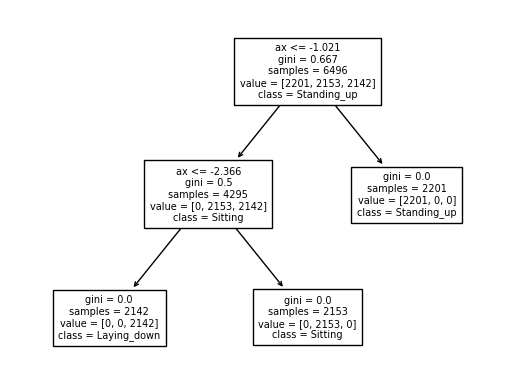

In [26]:
plot_tree(
    decision_tree=grid.best_estimator_,
    feature_names=['ax', 'ay', 'az', 'gx', 'gy', 'gz'],
    class_names=m_knn.movement_positions,
    fontsize=7,
)

#### Now it is time you look at the test set.

##### Using the tree-model above to predict the accuracy.


In [27]:
y_pred = grid.predict(X=m_knn.X_test)

In [28]:
accuracy_score(y_true=m_knn.y_test, y_pred=y_pred)

1.0

#### Plot the confusion matrix as well

#### Validation set

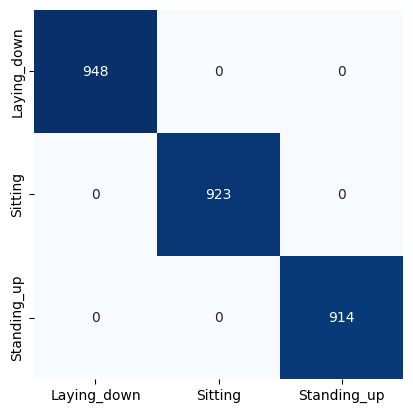

In [29]:
sns_cm(m_knn.y_test, y_pred)

##### Test set

In [30]:
dt_y_test_pred = grid.predict(X=m_knn.X_test_sample)

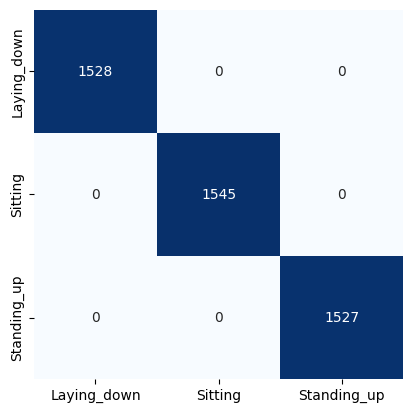

In [31]:
sns_cm(m_knn.y_true_sample, dt_y_test_pred)

##### Explain the difference between the accuracy for the validation set and the test set


##### Explain the result you see in the confusion matrix

In [32]:
display_accuracy(accuracy_score(y_true=m_knn.y_test, y_pred=y_pred), accuracy_score(y_true=m_knn.y_true_sample, y_pred=dt_y_test_pred))

Validation set accuracy: 1.0
Test set accuracy: 1.0


#### As a last step, it is time to compare the results from the KNN-model and the decision tree.

##### What is the difference between the accuracies?


##### Mean Score time


##### What is the difference between the confusion matrices?
